In [26]:
import pandas as pd  # 임포트문 불러오기
import matplotlib.pyplot as plt 
import numpy as np

# 문제1. 데이터 전처리 - 데이터 읽어오기

In [27]:
# 사용할 csv 파일 경로
csv_path = "data/NFLX.csv"

# csv 파일 읽어오기
df = pd.read_csv(csv_path, usecols=range(0,5))
#저장할 변수 = 임포트.read_csv(파일경로, unsecols(범위) = range(n, n))

# 출력
df


,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


# 문제2. 2021년 이후의 종가 데이터 출력하기

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14868\856485550.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2022['Date'] = pd.to_datetime(df_after_2022['Date'])


(array([18997., 19001., 19005., 19009., 19013., 19017., 19021., 19024.,
        19028.]),
 [Text(18997.0, 0, '2022-01-05'),
  Text(19001.0, 0, '2022-01-09'),
  Text(19005.0, 0, '2022-01-13'),
  Text(19009.0, 0, '2022-01-17'),
  Text(19013.0, 0, '2022-01-21'),
  Text(19017.0, 0, '2022-01-25'),
  Text(19021.0, 0, '2022-01-29'),
  Text(19024.0, 0, '2022-02-01'),
  Text(19028.0, 0, '2022-02-05')])

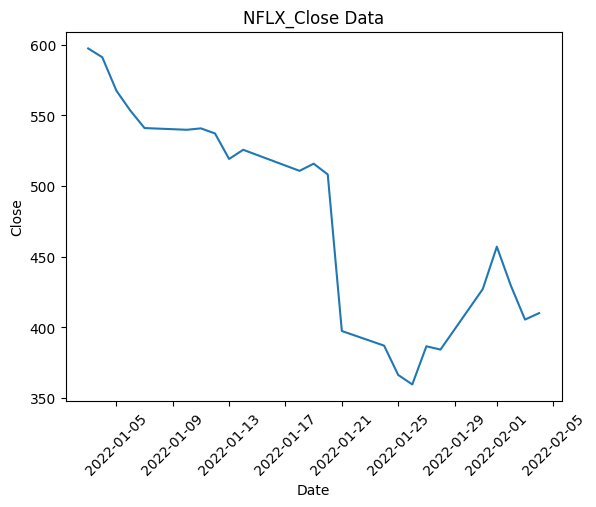

In [15]:
# csv파일 읽어온 새로운 함수 생성
df_2022 = pd.read_csv(csv_path, usecols=range(0, 5))


# 2022년 이전 데이터 필터링
df_after_2022 = df_2022[df_2022['Date'] >= "2022-01-01"]

# 출력
df_after_2022

# 날짜 데이터 변환 / 원래는 1일 단위로 되어 있던걸 1개월 단위나 몇일 단위로 나뉘어 나타남
df_after_2022['Date'] = pd.to_datetime(df_after_2022['Date'])

# 데이터 그래프 그리기
plt.plot(df_after_2022['Date'], df_after_2022['Close']) 
# 그리는 명령어(    x열 ,          y열      )

# 그래프 제목 설정
plt.title('NFLX_Close Data')

# x축 레이블 이름 설정
plt.xlabel('Date')

# y축 레이블 이름 설정
plt.ylabel('Close')

# x축 설정(회전)
plt.xticks(rotation=45)

# 문제3. 2021년 이후 최고, 최저 종가 출력

In [35]:
# csv 파일 불러오기
df_close = pd.read_csv(csv_path)

# 2021년 이후의 정보만 불러오기 2021년 1월 1일보다 크거나 같은것만
df_close_2022 = df_close[df_close['Date'] >= '2022-01-01']
 
max_price = max(df_close_2022['Close']) # 최대수 뽑기
min_price = min(df_close_2022['Close']) # 최소수 뽑기
print(f'''최고 증가 : {max_price}
최저 증가 : {min_price}''')

최고 증가 : 597.369995
최저 증가 : 359.700012


# 문제4. 2021년 이후 월 별 평균 종가 출력하기

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14868\1762283488.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close_month_2021['Date'] = pd.to_datetime(df_close_month_2021['Date'])


Text(0, 0.5, 'Close')

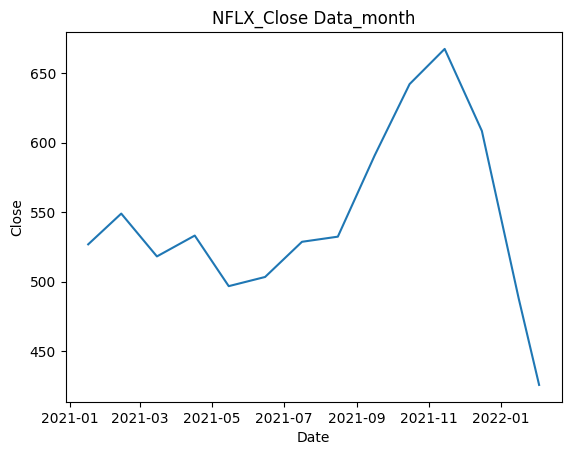

In [88]:
# csv 파일 불러오기
df_close_month = pd.read_csv(csv_path)

# 2021년 이후의 정보만 불러오기
df_close_month_2021 = df_close_month[df_close_month['Date'] >= '2021-01-01']

# date_time 으로 바꿔주기
df_close_month_2021['Date'] = pd.to_datetime(df_close_month_2021['Date'])

print(df_close_month_2021.dtypes)

# 월 별로 불러오기 / 그룹화 명령어로 그룹으로 묶고, maen()함수로 평균치 내기
df_close_month_2021_result = df_close_month_2021.groupby(df_close_month_2021['Date'].dt.strftime('%Y-%m')).mean()

# 그래프로 close수치로 나타내기
plt.plot(df_close_month_2021_result['Date'], df_close_month_2021_result['Close'])

# 그래프 제목 설정
plt.title('NFLX_Close Data')

# x축 레이블 이름 설정
plt.xlabel('Date')

# y축 레이블 이름 설정
plt.ylabel('Close')

# 문제5. 2022년 이후 최고, 최저, 종가 시각화하기

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14868\977831394.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_after['Date'] = pd.to_datetime(df_2022_after['Date'])


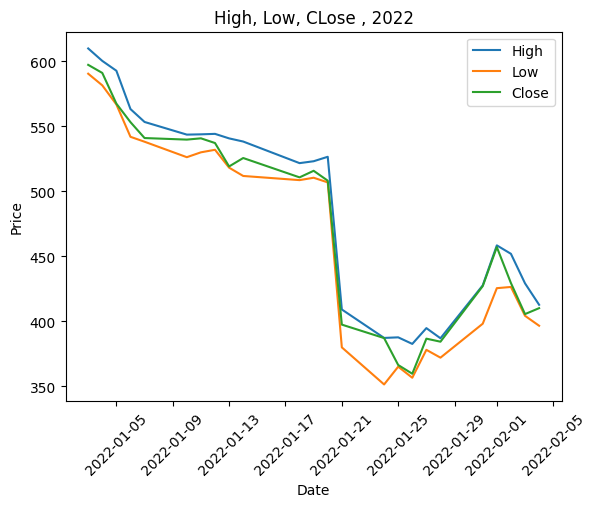

In [100]:
# 2022년 이후의 데이터만 필터링 하기
df_2022 = pd.read_csv(csv_path,usecols = range(0, 5)) # 불러오고

df_2022_after = df_2022[df_2022['Date'] >= '2022-01-01'] # 원하는 날짜 지정

# date_time 으로 바꿔주기 / 데이터화
df_2022_after['Date'] = pd.to_datetime(df_2022_after['Date'])

# 그래프 그리기
plt.plot(df_2022_after['Date'], df_2022_after['High'], label = 'High')
plt.plot(df_2022_after['Date'], df_2022_after['Low'], label = 'Low')
plt.plot(df_2022_after['Date'], df_2022_after['Close'], label = 'Close')

# 그래프 제목 설정
plt.title('High, Low, CLose , 2022')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Price')

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()